In [1]:
%load_ext autoreload
%autoreload 2

#import sys
#sys.path.append('../../')

import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import time

from src.data.helper_closed_transactions import read_epex_file, filter_lead_time, extract_transactions
from src.data.welfare_complete import clean_transactions, read_weekly_prices_file, read_NTC_file, NTC_preparation, match_transactions_both_sides, read_pw_file, pw_preparation

#set maximum columns display pandas
pd.options.display.max_columns = 50

In [4]:
# loading the daily csv file at day
df = read_epex_file("../data/external/EPEX_spot_continous_2019/DE Continuous Orders 2019-01/DE Continuous Orders 20190125.csv")

# filtering the daily csv file for the window of time of interest
df_filtered, unbounded_contract = filter_lead_time(df)


In [5]:
unbounded_contract

False

In [6]:
# derive transactions
pivoted, pivoted_levels = extract_transactions(
    df_filtered, unbounded_contract=unbounded_contract)

In [7]:
pivoted_levels[pivoted_levels['Instrument Type_S'] != pivoted_levels['Instrument Type_B']]

,End Validity Date_B,Executed Price & Volume_B,Delivery Start_B,Executed Volume_B,Execution Price_B,Initial ID_B,Instrument Type_B,Is Executed_B,Is block_B,Order ID_B,Parent ID_B,Price_B,Volume_B,index_B,lead_time_B,End Validity Date_S,Executed Price & Volume_S,Delivery Start_S,Executed Volume_S,Execution Price_S,Initial ID_S,Instrument Type_S,Is Executed_S,Is block_S,Order ID_S,Parent ID_S,Price_S,Volume_S,index_S,lead_time_S
1241,2019-01-25 01:28:00.274000+00:00,"(52.7, 0.5)",2019-01-25 02:00:00+00:00,0.5,52.7,10354463426,Quarter Hour,2,N,10354473758,1.03545e+10,52.7,2.2,110725,0 days 00:31:59.726000,2019-01-25 01:28:00.274000+00:00,"(52.7, 0.5)",2019-01-25 02:00:00+00:00,0.5,52.7,10354473068,Hour,1,N,10354473478,1.03545e+10,52.7,0.5,110419,0 days 00:31:59.726000
1242,2019-01-25 01:28:00.274000+00:00,"(52.7, 0.5)",2019-01-25 02:00:00+00:00,0.5,52.7,10354473132,Hour,2,N,10354473794,1.03545e+10,53.2,1.7,110768,0 days 00:31:59.726000,2019-01-25 01:28:00.274000+00:00,"(52.7, 0.5)",2019-01-25 02:00:00+00:00,0.5,52.7,10354473587,Quarter Hour,1,N,10354473792,1.03545e+10,52.2,0.5,110765,0 days 00:31:59.726000


,index,Order ID,Initial ID,Parent ID,Start Validity Date,End Validity Date,Cancelling Date,Delivery Date,Instrument Type,Delivery Instrument,Is block,Area,Side,Price,Volume,Is Executed,Execution Price,Executed Volume,Executed Price & Volume,Delivery Start,lead_time
0,57625,10354418924,10354418924,NaN,2019-01-24 23:00:00.806000+00:00,2019-01-24 23:29:02.208000+00:00,NaN,2019-01-25 00:00:00+00:00,Quarter Hour,0 days 00:00:00,N,DE-AMP,B,51.00,3.750,1,51.00,3.750,"(51.0, 3.75)",2019-01-25 00:00:00+00:00,0 days 00:30:57.792000
1,57626,10354418926,10354418926,NaN,2019-01-24 23:00:01.802000+00:00,2019-01-24 23:06:05.959000+00:00,NaN,2019-01-25 00:00:00+00:00,Quarter Hour,0 days 00:00:00,N,DE-AMP,B,66.90,1.250,2,66.90,0.950,"(66.9, 0.95)",2019-01-25 00:00:00+00:00,0 days 00:53:54.041000
2,57627,10354418926,10354418926,NaN,2019-01-24 23:06:05.959000+00:00,2019-01-24 23:06:05.959000+00:00,NaN,2019-01-25 00:00:00+00:00,Quarter Hour,0 days 00:00:00,N,DE-AMP,B,66.90,0.300,1,66.90,0.300,"(66.9, 0.3)",2019-01-25 00:00:00+00:00,0 days 00:53:54.041000
3,57633,10354418935,10354418935,NaN,2019-01-24 23:00:02.416000+00:00,2019-01-24 23:08:00.309000+00:00,NaN,2019-01-25 00:00:00+00:00,Quarter Hour,0 days 00:00:00,N,DE-50Hz,B,64.60,0.250,1,64.60,0.250,"(64.6, 0.25)",2019-01-25 00:00:00+00:00,0 days 00:51:59.691000
4,57681,10354419005,10354419005,NaN,2019-01-24 23:00:06.698000+00:00,2019-01-24 23:23:39.238000+00:00,NaN,2019-01-25 00:00:00+00:00,Quarter Hour,0 days 00:00:00,N,DE-50Hz,B,54.25,0.625,1,54.25,0.625,"(54.25, 0.625)",2019-01-25 00:00:00+00:00,0 days 00:36:20.762000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32619,607258,10355039912,10355039912,NaN,2019-01-25 23:13:47.203000+00:00,2019-01-25 23:13:47.203000+00:00,NaN,2019-01-25 00:00:00+00:00,Quarter Hour,0 days 23:45:00,N,DE-AMP,S,56.50,1.325,1,56.50,1.325,"(56.5, 1.325)",2019-01-25 23:45:00+00:00,0 days 00:31:12.797000
32620,607264,10355039960,10355039914,1.035504e+10,2019-01-25 23:14:01.341000+00:00,2019-01-25 23:14:01.341000+00:00,NaN,2019-01-25 00:00:00+00:00,Quarter Hour,0 days 23:45:00,N,DE-TPS,B,63.70,1.125,2,63.60,0.025,"(63.6, 0.025)",2019-01-25 23:45:00+00:00,0 days 00:30:58.659000
32621,607267,10355039960,10355039914,1.035504e+10,2019-01-25 23:14:01.341000+00:00,2019-01-25 23:14:01.341000+00:00,NaN,2019-01-25 00:00:00+00:00,Quarter Hour,0 days 23:45:00,N,DE-TPS,B,63.70,1.100,2,63.70,0.225,"(63.7, 0.225)",2019-01-25 23:45:00+00:00,0 days 00:30:58.659000
32622,607270,10355039963,10355039963,NaN,2019-01-25 23:14:01.934000+00:00,2019-01-25 23:14:01.934000+00:00,NaN,2019-01-25 00:00:00+00:00,Quarter Hour,0 days 23:45:00,N,DE-TPS,B,67.10,0.875,1,66.60,0.875,"(66.6, 0.875)",2019-01-25 23:45:00+00:00,0 days 00:30:58.066000


### Read EPEX file

Load continous order file

In [34]:
df=read_epex_file("../data/external/EPEX_spot_continous_2019/DE Continuous Orders 2019-04/DE Continuous Orders 20190406.csv",fast_load=False)

df_filtered=filter_lead_time(df) 

In [102]:
df_filtered[df_filtered['Side']=='B']['Executed Volume'].sum()

23890.824999999997

In [103]:
df_filtered[df_filtered['Side']=='S']['Executed Volume'].sum()

23889.35

In [44]:
pivoted, pivoted_levels=extract_transactions(df_filtered)



In [55]:
pivoted

Executed Volume  \
End Validity Date                Executed Price & Volume Delivery Start            Side                   
2019-04-05 23:00:03.150000+00:00 (46.97, 0.3)            2019-04-06 00:00:00+00:00 B                0.3   
                                                                                   S                0.3   
                                 (57.71, 0.5)            2019-04-06 00:00:00+00:00 B                0.5   
                                                                                   S                0.5   
2019-04-05 23:00:03.322000+00:00 (132.0, 0.25)           2019-04-06 00:00:00+00:00 B               0.25   
...                                                                                                 ...   
2019-04-06 23:14:37.170000+00:00 (36.68, 2.5)            2019-04-06 23:45:00+00:00 S                2.5   
                                 (36.98, 1.225)          2019-04-06 23:45:00+00:00 B              1.225   
                                                                                   S              1.225   
                                 (38.0, 0.825)           2019-04-06 23:45:00+00:00 B              0.825   
                                                                                   S              0.825   

                                                                                        Execution Price  \
End Validity Date                Executed Price & Volume Delivery Start            Side                   
2019-04-05 23:00:03.150000+00:00 (46.97, 0.3)            2019-04-06 00:00:00+00:00 B              46.97   
                                                                                   S              46.97   
                                 (57.71, 0.5)            2019-04-06 00:00:00+00:00 B              57.71   
                                                                                   S              57.71   
2019-04-05 23:00:03.322000+00:00 (132.0, 0.25)           2019-04-06 00:00:00+00:00 B                132   
...                                                                                                 ...   
2019-04-06 23:14:37.170000+00:00 (36.68, 2.5)            2019-04-06 23:45:00+00:00 S              36.68   
                                 (36.98, 1.225)          2019-04-06 23:45:00+00:00 B              36.98   
                                                                                   S              36.98   
                                 (38.0, 0.825)           2019-04-06 23:45:00+00:00 B                 38   
                                                                                   S                 38   

                                                                                          Initial ID  \
End Validity Date                Executed Price & Volume Delivery Start            Side                
2019-04-05 23:00:03.150000+00:00 (46.97, 0.3)            2019-04-06 00:00:00+00:00 B     10394330401   
                                                                                   S     10394330430   
                                 (57.71, 0.5)            2019-04-06 00:00:00+00:00 B     10394330401   
                                                                                   S     10394330429   
2019-04-05 23:00:03.322000+00:00 (132.0, 0.25)           2019-04-06 00:00:00+00:00 B     10394330401   
...                                                                                              ...   
2019-04-06 23:14:37.170000+00:00 (36.68, 2.5)            2019-04-06 23:45:00+00:00 S     10394922733   
                                 (36.98, 1.225)          2019-04-06 23:45:00+00:00 B     10394922799   
                                                                                   S     10394919691   
                                 (38.0, 0.825)           2019-04-06 23:45:00+00:00 B     10394922799   
                                                        

In [59]:
pivoted[pivoted['Order ID']==10394843423]

,,,,Executed Volume,Execution Price,Initial ID,Instrument Type,Is Executed,Is block,Order ID,Parent ID,Price,Volume,index,lead_time
End Validity Date,Executed Price & Volume,Delivery Start,Side,,,,,,,,,,,,
2019-04-06 20:00:00.012000+00:00,"(49.0, 1.475)",2019-04-06 21:00:00+00:00,B,1.475,49,10394819275,Quarter Hour,1,N,10394843423,1.03948e+10,49,1.475,549102,0 days 00:59:59.988000


In [68]:
pivoted.iloc[30560:30570]

Executed Volume  \
End Validity Date                Executed Price & Volume Delivery Start            Side                   
2019-04-06 19:59:31.371000+00:00 (35.6, 0.1)             2019-04-06 20:45:00+00:00 B                0.1   
                                                                                   S                0.1   
2019-04-06 20:00:00.012000+00:00 (49.0, 1.475)           2019-04-06 21:00:00+00:00 B              1.475   
2019-04-06 20:00:03.121000+00:00 (-19.98, 0.1)           2019-04-06 21:00:00+00:00 B                0.1   
                                                                                   S                0.1   
2019-04-06 20:00:11.870000+00:00 (35.5, 0.375)           2019-04-06 20:45:00+00:00 B              0.375   
                                                                                   S              0.375   
                                 (35.6, 0.425)           2019-04-06 20:45:00+00:00 B              0.425   
                                                                                   S              0.425   
2019-04-06 20:01:11.215000+00:00 (35.6, 0.05)            2019-04-06 20:45:00+00:00 B               0.05   

                                                                                        Execution Price  \
End Validity Date                Executed Price & Volume Delivery Start            Side                   
2019-04-06 19:59:31.371000+00:00 (35.6, 0.1)             2019-04-06 20:45:00+00:00 B               35.6   
                                                                                   S               35.6   
2019-04-06 20:00:00.012000+00:00 (49.0, 1.475)           2019-04-06 21:00:00+00:00 B                 49   
2019-04-06 20:00:03.121000+00:00 (-19.98, 0.1)           2019-04-06 21:00:00+00:00 B             -19.98   
                                                                                   S             -19.98   
2019-04-06 20:00:11.870000+00:00 (35.5, 0.375)           2019-04-06 20:45:00+00:00 B               35.5   
                                                                                   S               35.5   
                                 (35.6, 0.425)           2019-04-06 20:45:00+00:00 B               35.6   
                                                                                   S               35.6   
2019-04-06 20:01:11.215000+00:00 (35.6, 0.05)            2019-04-06 20:45:00+00:00 B               35.6   

                                                                                          Initial ID  \
End Validity Date                Executed Price & Volume Delivery Start            Side                
2019-04-06 19:59:31.371000+00:00 (35.6, 0.1)             2019-04-06 20:45:00+00:00 B     10394843273   
                                                                                   S     10394842761   
2019-04-06 20:00:00.012000+00:00 (49.0, 1.475)           2019-04-06 21:00:00+00:00 B     10394819275   
2019-04-06 20:00:03.121000+00:00 (-19.98, 0.1)           2019-04-06 21:00:00+00:00 B     10394843474   
                                                                                   S     10394843471   
2019-04-06 20:00:11.870000+00:00 (35.5, 0.375)           2019-04-06 20:45:00+00:00 B     10394843668   
                                                                                   S     10394843427   
                                 (35.6, 0.425)           2019-04-06 20:45:00+00:00 B     10394843668   
                                                                                   S     10394842761   
2019-04-06 20:01:11.215000+00:00 (35.6, 0.05)            2019-04-06 20:45:00+00:00 B     10394844221   

                                                                                        Instrument Type  \
End Validity Date                Executed Price & Volume Delivery Start            Side                   
2019-04-06 19:59:31.371000+00:00 (35.6, 0.1)           

In [109]:
problematic=[]
for ind, v in pivoted.groupby(level=0):
    d=dict(v.reset_index()['Side'].value_counts())
    s=set(v.reset_index()['Side'].values)

    if s!=set(['B', 'S']):
        problematic.append(ind)
    elif d['B']-d['S']!=0:
        problematic.append(ind)


In [110]:
problematic

[Timestamp('2019-04-06 16:15:00.011000+0000', tz='UTC'),
 Timestamp('2019-04-06 16:15:00.015000+0000', tz='UTC'),
 Timestamp('2019-04-06 19:30:00.014000+0000', tz='UTC'),
 Timestamp('2019-04-06 19:30:00.023000+0000', tz='UTC'),
 Timestamp('2019-04-06 19:45:00.012000+0000', tz='UTC'),
 Timestamp('2019-04-06 19:45:00.014000+0000', tz='UTC'),
 Timestamp('2019-04-06 20:00:00.012000+0000', tz='UTC')]

In [119]:
pivoted.xs(problematic[0], level=0, drop_level=False)

,,,,Executed Volume,Execution Price,Initial ID,Instrument Type,Is Executed,Is block,Order ID,Parent ID,Price,Volume,index,lead_time
End Validity Date,Executed Price & Volume,Delivery Start,Side,,,,,,,,,,,,
2019-04-06 16:15:00.011000+00:00,"(41.3, 0.15)",2019-04-06 17:15:00+00:00,S,0.15,41.3,10394741662,Quarter Hour,1,N,10394741662,NaN,41.3,0.15,461158,0 days 00:59:59.989000


In [128]:
pivoted[~pivoted.index.get_level_values('End Validity Date').isin(problematic)]

Executed Volume  \
End Validity Date                Executed Price & Volume Delivery Start            Side                   
2019-04-05 23:00:03.150000+00:00 (46.97, 0.3)            2019-04-06 00:00:00+00:00 B                0.3   
                                                                                   S                0.3   
                                 (57.71, 0.5)            2019-04-06 00:00:00+00:00 B                0.5   
                                                                                   S                0.5   
2019-04-05 23:00:03.322000+00:00 (132.0, 0.25)           2019-04-06 00:00:00+00:00 B               0.25   
...                                                                                                 ...   
2019-04-06 23:14:37.170000+00:00 (36.68, 2.5)            2019-04-06 23:45:00+00:00 S                2.5   
                                 (36.98, 1.225)          2019-04-06 23:45:00+00:00 B              1.225   
                                                                                   S              1.225   
                                 (38.0, 0.825)           2019-04-06 23:45:00+00:00 B              0.825   
                                                                                   S              0.825   

                                                                                        Execution Price  \
End Validity Date                Executed Price & Volume Delivery Start            Side                   
2019-04-05 23:00:03.150000+00:00 (46.97, 0.3)            2019-04-06 00:00:00+00:00 B              46.97   
                                                                                   S              46.97   
                                 (57.71, 0.5)            2019-04-06 00:00:00+00:00 B              57.71   
                                                                                   S              57.71   
2019-04-05 23:00:03.322000+00:00 (132.0, 0.25)           2019-04-06 00:00:00+00:00 B                132   
...                                                                                                 ...   
2019-04-06 23:14:37.170000+00:00 (36.68, 2.5)            2019-04-06 23:45:00+00:00 S              36.68   
                                 (36.98, 1.225)          2019-04-06 23:45:00+00:00 B              36.98   
                                                                                   S              36.98   
                                 (38.0, 0.825)           2019-04-06 23:45:00+00:00 B                 38   
                                                                                   S                 38   

                                                                                          Initial ID  \
End Validity Date                Executed Price & Volume Delivery Start            Side                
2019-04-05 23:00:03.150000+00:00 (46.97, 0.3)            2019-04-06 00:00:00+00:00 B     10394330401   
                                                                                   S     10394330430   
                                 (57.71, 0.5)            2019-04-06 00:00:00+00:00 B     10394330401   
                                                                                   S     10394330429   
2019-04-05 23:00:03.322000+00:00 (132.0, 0.25)           2019-04-06 00:00:00+00:00 B     10394330401   
...                                                                                              ...   
2019-04-06 23:14:37.170000+00:00 (36.68, 2.5)            2019-04-06 23:45:00+00:00 S     10394922733   
                                 (36.98, 1.225)          2019-04-06 23:45:00+00:00 B     10394922799   
                                                                                   S     10394919691   
                                 (38.0, 0.825)           2019-04-06 23:45:00+00:00 B     10394922799   
                                                        

In [45]:
pivoted_levels.head()

,End Validity Date_B,Executed Price & Volume_B,Delivery Start_B,Executed Volume_B,Execution Price_B,Initial ID_B,Instrument Type_B,Is Executed_B,Is block_B,Order ID_B,Parent ID_B,Price_B,Volume_B,index_B,lead_time_B,End Validity Date_S,Executed Price & Volume_S,Delivery Start_S,Executed Volume_S,Execution Price_S,Initial ID_S,Instrument Type_S,Is Executed_S,Is block_S,Order ID_S,Parent ID_S,Price_S,Volume_S,index_S,lead_time_S
0,2019-04-05 23:00:03.150000+00:00,"(46.97, 0.3)",2019-04-06 00:00:00+00:00,0.3,46.97,10394330401,Quarter Hour,2,N,10394330439,1.03943e+10,132,1.525,44994,0 days 00:59:56.850000,2019-04-05 23:00:03.150000+00:00,"(46.97, 0.3)",2019-04-06 00:00:00+00:00,0.3,46.97,10394330430,Quarter Hour,1,N,10394330430,NaN,46.97,0.3,44986,0 days 00:59:56.850000
1,2019-04-05 23:00:03.150000+00:00,"(57.71, 0.5)",2019-04-06 00:00:00+00:00,0.5,57.71,10394330401,Quarter Hour,2,N,10394330439,1.03943e+10,132,1.225,44995,0 days 00:59:56.850000,2019-04-05 23:00:03.150000+00:00,"(57.71, 0.5)",2019-04-06 00:00:00+00:00,0.5,57.71,10394330429,Quarter Hour,1,N,10394330429,NaN,57.71,0.5,44985,0 days 00:59:56.850000
2,2019-04-05 23:00:03.322000+00:00,"(132.0, 0.25)",2019-04-06 00:00:00+00:00,0.25,132,10394330401,Quarter Hour,2,N,10394330439,1.03943e+10,132,0.725,44996,0 days 00:59:56.678000,2019-04-05 23:00:03.322000+00:00,"(132.0, 0.25)",2019-04-06 00:00:00+00:00,0.25,132,10394330440,Quarter Hour,1,N,10394330440,NaN,110.66,0.25,44998,0 days 00:59:56.678000
3,2019-04-05 23:00:03.826000+00:00,"(33.62, 4.9)",2019-04-06 00:00:00+00:00,4.9,33.62,10394330409,Hour,1,N,10394330409,NaN,33.62,4.9,44972,0 days 00:59:56.174000,2019-04-05 23:00:03.826000+00:00,"(33.62, 4.9)",2019-04-06 00:00:00+00:00,4.9,33.62,10394330447,Hour,2,N,10394330447,NaN,32.8,10,45001,0 days 00:59:56.174000
4,2019-04-05 23:00:05.548000+00:00,"(143.86, 0.25)",2019-04-06 00:00:00+00:00,0.25,143.86,10394330401,Quarter Hour,2,N,10394330472,1.03943e+10,143.86,0.475,45023,0 days 00:59:54.452000,2019-04-05 23:00:05.548000+00:00,"(143.86, 0.25)",2019-04-06 00:00:00+00:00,0.25,143.86,10394330477,Quarter Hour,1,N,10394330477,NaN,61.9,0.25,45029,0 days 00:59:54.452000


In [41]:
# pivoted_levels.reset_index(inplace=True)

In [52]:
def clean_transactions(x):

    # check that instrument type of buy and sell is the same
    check = x['Instrument Type_S'] == x['Instrument Type_B']
    if len(check.unique()) == 1:

        df = x.drop(['Executed Volume_S',
                     'Execution Price_S',
                     'Instrument Type_S',
                     'End Validity Date_S',
                     'Executed Price & Volume_S',
                     'Delivery Start_S',
                     'lead_time_S'], 1)
        df.rename(columns={'Executed Volume_B': 'Executed Volume',
                           'Execution Price_B': 'Execution Price',
                           'Instrument Type_B': 'Instrument Type',
                           'End Validity Date_B': 'End Validity Date',
                           'Executed Price & Volume_B': 'Executed Price & Volume',
                           'Delivery Start_B': 'Delivery Start',
                           'lead_time_B': 'lead_time'
                           }, inplace=True)

        return df
    
    else:
        print(f'\n An error as occured: the instrument type of at least one buy and sell order is different')



In [54]:
check = pivoted_levels['Instrument Type_S'] != pivoted_levels['Instrument Type_B']
pivoted_levels[check]

,End Validity Date_B,Executed Price & Volume_B,Delivery Start_B,Executed Volume_B,Execution Price_B,Initial ID_B,Instrument Type_B,Is Executed_B,Is block_B,Order ID_B,Parent ID_B,Price_B,Volume_B,index_B,lead_time_B,End Validity Date_S,Executed Price & Volume_S,Delivery Start_S,Executed Volume_S,Execution Price_S,Initial ID_S,Instrument Type_S,Is Executed_S,Is block_S,Order ID_S,Parent ID_S,Price_S,Volume_S,index_S,lead_time_S
15281,2019-04-06 20:00:00.012000+00:00,"(49.0, 1.475)",2019-04-06 21:00:00+00:00,1.475,49,10394819275,Quarter Hour,1,N,10394843423,1.03948e+10,49,1.475,549102,0 days 00:59:59.988000,2019-04-06 20:00:03.121000+00:00,"(-19.98, 0.1)",2019-04-06 21:00:00+00:00,0.1,-19.98,10394843471,Hour,1,N,10394843471,NaN,-19.98,0.1,549142,0 days 00:59:56.879000
15282,2019-04-06 20:00:03.121000+00:00,"(-19.98, 0.1)",2019-04-06 21:00:00+00:00,0.1,-19.98,10394843474,Hour,2,N,10394843474,NaN,34.68,3,549145,0 days 00:59:56.879000,2019-04-06 20:00:11.870000+00:00,"(35.5, 0.375)",2019-04-06 20:45:00+00:00,0.375,35.5,10394843427,Quarter Hour,1,N,10394843427,NaN,35.5,0.375,549104,0 days 00:44:48.130000
15286,2019-04-06 20:01:11.215000+00:00,"(35.9, 0.35)",2019-04-06 20:45:00+00:00,0.35,35.9,10394844221,Quarter Hour,1,N,10394844221,NaN,37.35,0.35,549858,0 days 00:43:48.785000,2019-04-06 20:01:30.429000+00:00,"(45.8, 1.0)",2019-04-06 21:00:00+00:00,1,45.8,10394844364,Hour,2,N,10394844364,NaN,45.8,4,549999,0 days 00:58:29.571000
15296,2019-04-06 20:01:56.160000+00:00,"(45.9, 4.0)",2019-04-06 21:00:00+00:00,4,45.9,10394844590,Hour,1,N,10394844590,NaN,45.9,4,550234,0 days 00:58:03.840000,2019-04-06 20:01:57.354000+00:00,"(35.9, 0.25)",2019-04-06 20:45:00+00:00,0.25,35.9,10394844233,Quarter Hour,2,N,10394844233,NaN,35.9,1.25,549871,0 days 00:43:02.646000
15297,2019-04-06 20:01:57.354000+00:00,"(35.9, 0.25)",2019-04-06 20:45:00+00:00,0.25,35.9,10394844140,Quarter Hour,1,N,10394844610,1.03948e+10,36.9,0.25,550254,0 days 00:43:02.646000,2019-04-06 20:01:58.989000+00:00,"(45.9, 9.0)",2019-04-06 21:00:00+00:00,9,45.9,10394844607,Hour,1,N,10394844607,NaN,45.9,9,550251,0 days 00:58:01.011000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17194,2019-04-06 22:29:40.990000+00:00,"(40.0, 1.7)",2019-04-06 23:00:00+00:00,1.7,40,10394904585,Hour,1,N,10394904585,NaN,40,1.7,595965,0 days 00:30:19.010000,2019-04-06 22:29:40.990000+00:00,"(41.0, 0.425)",2019-04-06 23:00:00+00:00,0.425,41,10394904586,Quarter Hour,1,N,10394904586,NaN,41,0.425,595966,0 days 00:30:19.010000
17197,2019-04-06 22:29:40.990000+00:00,"(44.0, 0.375)",2019-04-06 23:15:00+00:00,0.375,44,10394904489,Quarter Hour,1,N,10394904489,NaN,44,0.375,595899,0 days 00:45:19.010000,2019-04-06 22:29:41.124000+00:00,"(40.0, 2.0)",2019-04-06 23:00:00+00:00,2,40,10394904578,Hour,2,N,10394904578,NaN,40,3.3,595953,0 days 00:30:18.876000
17198,2019-04-06 22:29:41.124000+00:00,"(40.0, 2.0)",2019-04-06 23:00:00+00:00,2,40,10394904591,Hour,1,N,10394904591,NaN,40,2,595973,0 days 00:30:18.876000,2019-04-06 22:29:41.124000+00:00,"(41.0, 0.5)",2019-04-06 23:00:00+00:00,0.5,41,10394904592,Quarter Hour,1,N,10394904592,NaN,41,0.5,595974,0 days 00:30:18.876000
17200,2019-04-06 22:29:41.124000+00:00,"(43.99, 0.5)",2019-04-06 23:15:00+00:00,0.5,43.99,10394904488,Quarter Hour,2,N,10394904488,NaN,43.99,0.575,595896,0 days 00:45:18.876000,2019-04-06 22:29:41.225000+00:00,"(40.0, 0.6)",2019-04-06 23:00:00+00:00,0.6,40,10394904578,Hour,2,N,10394904578,NaN,40,1.3,595954,0 days 00:30:18.775000


In [53]:
pivoted_levels_clean=clean_transactions(pivoted_levels)
pivoted_levels_clean.shape   


 An error as occured: the instrument type of at least one buy and sell order is different


AttributeError: 'NoneType' object has no attribute 'shape'

### Read Hydro Price, NTC

Read hydro marginal prices

In [4]:
wp=read_weekly_prices_file("../data/external/Hydro Generation and Price_CH_2019.csv")

Process NTC and prepare dynamic NTC file for optimization

In [5]:
# load NTC
NTC = read_NTC_file("../data/external/NTC_DEandCH_2019.csv")
NTC = NTC_preparation(NTC)

/Users/gianlucamancini/Documents/eth_codes/case_study/case_study_2_alpiq/env/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


### Read and prepare Power Limit

Prepare the power limit file to have the same frequency of 15 minutes of the NTC

In [8]:
power_lim=read_pw_file("../data/external/Hydro Generation up- downscale Potential_CH_2019.csv")
power_lim=pw_preparation(power_lim)

In [9]:
power_lim.head()

,VALUE_TIME,start_time,end_time,Selling Actual value update [MW],Pumping Actual value update [MW],Upscale Potential [MW],Donwnscale Potential [MW]
0,2019-01-01 00:00:00+00:00,2019-01-01 00:00:00+00:00,2019-01-01 00:15:00+00:00,4145,260,4145,260
1,2019-01-01 00:15:00+00:00,2019-01-01 00:15:00+00:00,2019-01-01 00:30:00+00:00,4145,260,4145,260
2,2019-01-01 00:30:00+00:00,2019-01-01 00:30:00+00:00,2019-01-01 00:45:00+00:00,4145,260,4145,260
3,2019-01-01 00:45:00+00:00,2019-01-01 00:45:00+00:00,2019-01-01 01:00:00+00:00,4145,260,4145,260
4,2019-01-01 01:00:00+00:00,2019-01-01 01:00:00+00:00,2019-01-01 01:15:00+00:00,4238,167,4238,167


### Optimization process

In [10]:
tic = time.time()
pivoted_levels_sort = match_transactions_both_sides(pivoted_levels, NTC, wp, power_lim)
toc = time.time()

In [11]:
print(f'Updating the transaction completely takes {toc-tic} seconds')

Updating the transaction completely takes 92.94603204727173 seconds


In [12]:
pivoted_levels_sort.head()

,index,End Validity Date,Executed Price & Volume,Delivery Start,Executed Volume,Execution Price,Initial ID_B,Instrument Type,Is Executed_B,Is block_B,Order ID_B,Parent ID_B,Price_B,Volume_B,index_B,lead_time,Initial ID_S,Is Executed_S,Is block_S,Order ID_S,Parent ID_S,Price_S,Volume_S,index_S,weekly_hydro_marginal_price_selling,weekly_hydro_marginal_price_pumping,possible_match_selling,possible_match_pumping,match_binary_outcome_pumping,match_binary_outcome_selling,A posteriori Execution Price
0,0,2019-04-24 23:00:04.214000+00:00,"(28.1, 0.325)",2019-04-25 00:00:00+00:00,0.325,28.1,10405822351,Quarter Hour,1,N,10405822379,1.04058e+10,81,0.325,65408,0 days 00:59:55.786000,10405822363,2,N,10405822363,NaN,28.1,6,65397,35.651908,24.956336,False,False,0,0,28.10
5,5,2019-04-24 23:01:33.033000+00:00,"(24.5, 5.0)",2019-04-25 00:00:00+00:00,5,24.5,10405823391,Hour,2,N,10405823391,NaN,24.8,8,66325,0 days 00:58:26.967000,10405823163,2,N,10405823163,NaN,24.5,5,66102,35.651908,24.956336,False,True,4,0,24.50
3,3,2019-04-24 23:01:33.033000+00:00,"(24.5, 0.6)",2019-04-25 00:00:00+00:00,0.6,24.5,10405823391,Hour,2,N,10405823391,NaN,24.8,3,66328,0 days 00:58:26.967000,10405822460,1,N,10405823175,1.04058e+10,24.5,0.6,66115,35.651908,24.956336,False,True,4,0,24.50
2,2,2019-04-24 23:01:33.033000+00:00,"(24.49, 5.0)",2019-04-25 00:00:00+00:00,5,24.49,10405823391,Hour,2,N,10405823391,NaN,24.8,13,66326,0 days 00:58:26.967000,10405823225,1,N,10405823225,NaN,24.49,5,66157,35.651908,24.956336,False,True,4,0,24.49
4,4,2019-04-24 23:01:33.033000+00:00,"(24.5, 2.4)",2019-04-25 00:00:00+00:00,2.4,24.5,10405823391,Hour,1,N,10405823391,NaN,24.8,2.4,66329,0 days 00:58:26.967000,10405823163,2,N,10405823163,NaN,24.5,5,66103,35.651908,24.956336,False,True,4,0,24.50


In [13]:
pivoted_levels_sort[pivoted_levels_sort['match_binary_outcome_selling']==1]['Executed Volume'].sum()

19920.300000000014

<AxesSubplot:xlabel='Delivery Start'>

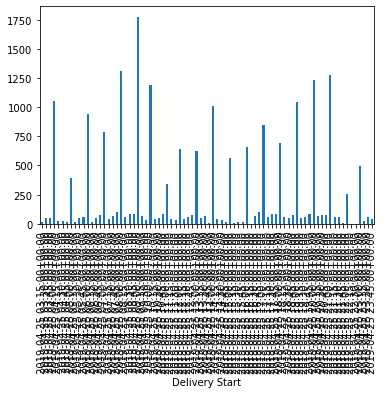

In [14]:
pivoted_levels_sort[pivoted_levels_sort['match_binary_outcome_selling']==1].groupby('Delivery Start')['Executed Volume'].sum().plot(kind='bar')

Local plotting

In [15]:
NTC_selection = NTC[(NTC['start_time'].dt.day == 25) & (
            NTC['start_time'].dt.month == 4)]
NTC_selection

,Date from,Time from,Time to,CH to DE_Utilized capacity (MW),CH to DE_Actual value (MW),De to CH_Utilized capacity (MW),DE to CH_Actual value (MW),Intraday has taken place,Time from hour,Time from min,start_time,Time to hour,Time to min,end_time,CH to DE_Actual value (MW) update,DE to CH_Actual value (MW) update
10940,2019-04-25 00:00:00+00:00,00:00,00:15,4385,0,415,385,Yes,0,0,2019-04-25 00:00:00+00:00,0,15,2019-04-25 00:15:00+00:00,0.0,0.0
10941,2019-04-25 00:00:00+00:00,00:15,00:30,4385,0,415,385,Yes,0,15,2019-04-25 00:15:00+00:00,0,30,2019-04-25 00:30:00+00:00,0.0,0.0
10942,2019-04-25 00:00:00+00:00,00:30,00:45,4385,0,415,385,Yes,0,30,2019-04-25 00:30:00+00:00,0,45,2019-04-25 00:45:00+00:00,0.0,0.0
10943,2019-04-25 00:00:00+00:00,00:45,01:00,4385,0,415,385,Yes,0,45,2019-04-25 00:45:00+00:00,1,0,2019-04-25 01:00:00+00:00,0.0,0.0
10944,2019-04-25 00:00:00+00:00,01:00,01:15,4481,0,318,482,Yes,1,0,2019-04-25 01:00:00+00:00,1,15,2019-04-25 01:15:00+00:00,0.0,281.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11031,2019-04-25 00:00:00+00:00,22:45,23:00,64,1936,2911,0,Yes,22,45,2019-04-25 22:45:00+00:00,23,0,2019-04-25 23:00:00+00:00,1744.0,0.0
11032,2019-04-25 00:00:00+00:00,23:00,23:15,578,1422,2603,0,Yes,23,0,2019-04-25 23:00:00+00:00,23,15,2019-04-25 23:15:00+00:00,888.1,0.0
11033,2019-04-25 00:00:00+00:00,23:15,23:30,578,1422,2603,0,Yes,23,15,2019-04-25 23:15:00+00:00,23,30,2019-04-25 23:30:00+00:00,850.6,0.0
11034,2019-04-25 00:00:00+00:00,23:30,23:45,578,1422,2603,0,Yes,23,30,2019-04-25 23:30:00+00:00,23,45,2019-04-25 23:45:00+00:00,726.4,0.0


In [18]:
times = NTC_selection['start_time']
times_tr = pivoted_levels_sort['Delivery Start']

gb = pivoted_levels_sort[pivoted_levels_sort['match_binary_outcome_selling']==1].groupby(times_tr.dt.hour)['Executed Volume']

ntc_gb = NTC_selection.groupby(times.dt.hour)['CH to DE_Actual value (MW)']

In [32]:
d_hours_new = dict(zip(list(gb.groups.keys()), gb.sum()))

<BarContainer object of 21 artists>

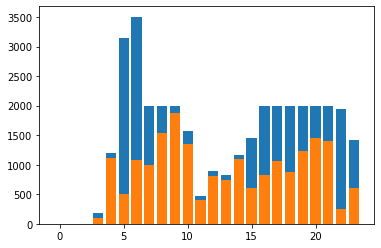

In [33]:
plt.bar(ntc_gb.groups.keys(),ntc_gb.mean())
plt.bar(d_hours_new.keys(),d_hours_new.values())

In [24]:
pivoted_levels_sort[pivoted_levels_sort['match_binary_outcome_selling']==1]

,index,End Validity Date,Executed Price & Volume,Delivery Start,Executed Volume,Execution Price,Initial ID_B,Instrument Type,Is Executed_B,Is block_B,Order ID_B,Parent ID_B,Price_B,Volume_B,index_B,lead_time,Initial ID_S,Is Executed_S,Is block_S,Order ID_S,Parent ID_S,Price_S,Volume_S,index_S,weekly_hydro_marginal_price_selling,weekly_hydro_marginal_price_pumping,possible_match_selling,possible_match_pumping,match_binary_outcome_pumping,match_binary_outcome_selling,A posteriori Execution Price
240,240,2019-04-02 23:16:54.827000+00:00,"(43.6, 0.2)",2019-04-03 00:00:00+00:00,0.2,43.6,10392472196,Hour,2,N,10392472196,NaN,43.6,1,57689,0 days 00:43:05.173000,10392472082,1,N,10392472082,NaN,43.6,0.2,57576,43.469349,30.428544,True,False,0,1,43.469349
241,241,2019-04-02 23:16:54.992000+00:00,"(43.79, 0.5)",2019-04-03 00:00:00+00:00,0.5,43.79,10392472196,Hour,2,N,10392472200,1.03925e+10,43.79,0.8,57691,0 days 00:43:05.008000,10392472131,1,N,10392472131,NaN,43.79,0.5,57622,43.469349,30.428544,True,False,0,1,43.469349
242,242,2019-04-02 23:16:55.118000+00:00,"(43.8, 0.3)",2019-04-03 00:00:00+00:00,0.3,43.8,10392472196,Hour,1,N,10392472201,1.03925e+10,43.8,0.3,57693,0 days 00:43:04.882000,10392472126,2,N,10392472126,NaN,43.8,4,57617,43.469349,30.428544,True,False,0,1,43.469349
249,249,2019-04-02 23:17:04.933000+00:00,"(43.54, 0.2)",2019-04-03 00:00:00+00:00,0.2,43.54,10392472285,Hour,2,N,10392472285,NaN,43.54,5,57766,0 days 00:42:55.067000,10392472215,1,N,10392472215,NaN,43.54,0.2,57704,43.469349,30.428544,True,False,0,1,43.469349
250,250,2019-04-02 23:17:05.064000+00:00,"(43.54, 2.4)",2019-04-03 00:00:00+00:00,2.4,43.54,10392472285,Hour,2,N,10392472285,NaN,43.54,4.8,57764,0 days 00:42:54.936000,10392470678,1,N,10392472286,1.03925e+10,43.4,2.4,57767,43.469349,30.428544,True,False,0,1,43.469349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17076,17076,2019-04-03 20:05:18.198000+00:00,"(43.6, 0.425)",2019-04-03 20:45:00+00:00,0.425,43.6,10393020117,Quarter Hour,1,N,10393020117,NaN,45,0.425,591593,0 days 00:39:41.802000,10393010624,2,N,10393019802,1.0393e+10,43.6,2.25,591283,43.469349,30.428544,True,False,0,1,43.469349
17078,17078,2019-04-03 20:05:22.002000+00:00,"(43.5, 0.5)",2019-04-03 20:45:00+00:00,0.5,43.5,10393020149,Quarter Hour,2,N,10393020149,NaN,45,2.5,591617,0 days 00:39:37.998000,10393020123,1,N,10393020123,NaN,43.5,0.5,591601,43.469349,30.428544,True,False,0,1,43.469349
17080,17080,2019-04-03 20:05:22.002000+00:00,"(43.6, 1.825)",2019-04-03 20:45:00+00:00,1.825,43.6,10393020149,Quarter Hour,2,N,10393020149,NaN,45,1.925,591616,0 days 00:39:37.998000,10393010624,1,N,10393019802,1.0393e+10,43.6,1.825,591284,43.469349,30.428544,True,False,0,1,43.469349
17079,17079,2019-04-03 20:05:22.002000+00:00,"(43.6, 0.1)",2019-04-03 20:45:00+00:00,0.1,43.6,10393020149,Quarter Hour,1,N,10393020149,NaN,45,0.1,591615,0 days 00:39:37.998000,10393020140,2,N,10393020140,NaN,43.6,0.5,591608,43.469349,30.428544,True,False,0,1,43.469349


In [31]:
time=pd.to_datetime('2019-04-03 00:00:00+0000')
multiplier_instr_type = {'Hour': 1, 'Half Hour': 2, 'Quarter Hour': 4}
instru_type='Hour'
index_NTC = NTC[(NTC['start_time'] >= time) & 
                (NTC['end_time'] <= time +pd.Timedelta(60/multiplier_instr_type[instru_type], unit='min'))].index

In [32]:
NTC.iloc[index_NTC]

,Date from,Time from,Time to,CH to DE_Utilized capacity (MW),CH to DE_Actual value (MW),De to CH_Utilized capacity (MW),DE to CH_Actual value (MW),Intraday has taken place,Time from hour,Time from min,start_time,Time to hour,Time to min,end_time,CH to DE_Actual value (MW) update,DE to CH_Actual value (MW) update
8828,2019-04-03 00:00:00+00:00,00:00,00:15,4724,0,70,730,Yes,0,0,2019-04-03 00:00:00+00:00,0,15,2019-04-03 00:15:00+00:00,0.0,730.0
8829,2019-04-03 00:00:00+00:00,00:15,00:30,4724,0,70,730,Yes,0,15,2019-04-03 00:15:00+00:00,0,30,2019-04-03 00:30:00+00:00,0.0,730.0
8830,2019-04-03 00:00:00+00:00,00:30,00:45,4724,0,70,730,Yes,0,30,2019-04-03 00:30:00+00:00,0,45,2019-04-03 00:45:00+00:00,0.0,729.3
8831,2019-04-03 00:00:00+00:00,00:45,01:00,4724,0,70,730,Yes,0,45,2019-04-03 00:45:00+00:00,1,0,2019-04-03 01:00:00+00:00,0.0,730.0


In [33]:
np.product([])

1.0

In [17]:
NTC[(NTC['start_time']>=pd.to_datetime('2019-04-03 00:00:00+0000'))&
    (NTC['start_time']<=pd.to_datetime('2019-04-04 00:00:00+0000'))].iloc[:60]

,Date from,Time from,Time to,CH to DE_Utilized capacity (MW),CH to DE_Actual value (MW),De to CH_Utilized capacity (MW),DE to CH_Actual value (MW),Intraday has taken place,Time from hour,Time from min,start_time,Time to hour,Time to min,end_time,CH to DE_Actual value (MW) update,DE to CH_Actual value (MW) update
8828,2019-04-03 00:00:00+00:00,00:00,00:15,4724,0,70,730,Yes,0,0,2019-04-03 00:00:00+00:00,0,15,2019-04-03 00:15:00+00:00,0.0,730.0
8829,2019-04-03 00:00:00+00:00,00:15,00:30,4724,0,70,730,Yes,0,15,2019-04-03 00:15:00+00:00,0,30,2019-04-03 00:30:00+00:00,0.0,730.0
8830,2019-04-03 00:00:00+00:00,00:30,00:45,4724,0,70,730,Yes,0,30,2019-04-03 00:30:00+00:00,0,45,2019-04-03 00:45:00+00:00,0.0,729.3
8831,2019-04-03 00:00:00+00:00,00:45,01:00,4724,0,70,730,Yes,0,45,2019-04-03 00:45:00+00:00,1,0,2019-04-03 01:00:00+00:00,0.0,730.0
8832,2019-04-03 00:00:00+00:00,01:00,01:15,4635,0,157,643,Yes,1,0,2019-04-03 01:00:00+00:00,1,15,2019-04-03 01:15:00+00:00,0.0,643.0
8833,2019-04-03 00:00:00+00:00,01:15,01:30,4635,0,157,643,Yes,1,15,2019-04-03 01:15:00+00:00,1,30,2019-04-03 01:30:00+00:00,0.0,643.0
8834,2019-04-03 00:00:00+00:00,01:30,01:45,4635,0,157,643,Yes,1,30,2019-04-03 01:30:00+00:00,1,45,2019-04-03 01:45:00+00:00,0.0,642.4
8835,2019-04-03 00:00:00+00:00,01:45,02:00,4635,0,157,643,Yes,1,45,2019-04-03 01:45:00+00:00,2,0,2019-04-03 02:00:00+00:00,0.0,643.0
8836,2019-04-03 00:00:00+00:00,02:00,02:15,4909,0,276,924,Yes,2,0,2019-04-03 02:00:00+00:00,2,15,2019-04-03 02:15:00+00:00,0.0,750.7
8837,2019-04-03 00:00:00+00:00,02:15,02:30,4909,0,276,924,Yes,2,15,2019-04-03 02:15:00+00:00,2,30,2019-04-03 02:30:00+00:00,0.0,885.2
